In [1]:
# RESULT: 0.5190580 93 / 150


from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import sklearn.ensemble

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss


import numpy as np
import pandas
import sklearn.ensemble
import sklearn.metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import pandas as pd

import numpy as np
import pandas as pd
import re



# 'SK_ID' - IDшник
# 'CELL_LAC_ID' - ID соты
# 'MON' - месяц рассчета
# 'SUM_MINUTES' - суммарный трафик абонента на этой соте
# 'SUM_DATA_MB' - суммарный трафик в Мб
# 'SUM_DATA_MIN' - суммарная продолжительность data-сессий
train1 = pandas.read_csv('./train/subs_bs_consumption_train.csv', sep=';')
test1 = pandas.read_csv('./test/subs_bs_consumption_test.csv', sep = ';')



#'SK_ID' - IDшник
#'CELL_LAC_ID' - номер соты
#'DATA_VOL_MB' - сколько Мб использовали
#'START_TIME' - время начала
train2 = pandas.read_csv('./train/subs_bs_data_session_train.csv', sep=';')
test2 = pandas.read_csv('./test/subs_bs_data_session_test.csv', sep = ';')



#'SK_ID' - IDшник
#'CELL_LAC_ID' - номер соты
#'VOICE_DUR_MIN' - длина разговора
#'START_TIME' - время начала
train3 = pandas.read_csv('./train/subs_bs_voice_session_train.csv', sep=';')
test3 = pandas.read_csv('./test/subs_bs_voice_session_test.csv', sep = ';')


#CSI - оценка, целевой
#SK_ID - ID клиента
#CONTACT_DATE - дата опроса
train4 = pandas.read_csv('./train/subs_csi_train.csv', sep=';')
test4 = pandas.read_csv('./test/subs_csi_test.csv', sep = ';')

#'SK_ID' - Idшник 
#'SNAP_DATE' - дата рассчета показателей
#'COM_CAT#1', 'COM_CAT#2', 'COM_CAT#3',u'COM_CAT#7', u'COM_CAT#8', u'COM_CAT#17', u'COM_CAT#18',
# 'COM_CAT#19', u'COM_CAT#20', u'COM_CAT#21', u'COM_CAT#22',
# 'COM_CAT#23', u'COM_CAT#24', u'COM_CAT#25', u'COM_CAT#26',
# 'COM_CAT#27', u'COM_CAT#28', u'COM_CAT#29', u'COM_CAT#30',
# 'COM_CAT#31', u'COM_CAT#32', u'COM_CAT#33', u'COM_CAT#34' - характеристики
# 'BASE_TYPE' - старая/новая абонентская база
# 'ACT' - активность абонента
# 'ARPU_GROUP' - группа по ARPU
# 'DEVICE_TYPE_ID' - тип устройства
# 'INTERNET_TYPE_ID' - 2G/3G/4G
# 'REVENUE' - выручка
# 'ITC' - расходы на интернет
# 'VAS' - расходы на VAS
# 'RENT_CHANNEL' - расходы на аренду каналов


# 'ROAM' - расходы на роуминг
# 'COST' - себестоимость
train5 = pandas.read_csv('./train/subs_features_train.csv', sep=';')
test5 = pandas.read_csv('./test/subs_features_test.csv', sep=';')

/home/ravasiliev/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def to_f(x):
    if issubclass(str,type(x)):
        x = x.replace(',','.')
    return float(x)

to_float = np.vectorize(to_f)

In [3]:
data = train5

CAT = []
for i in data.columns:
    if re.match(r'COM_CAT',i):
        CAT.append(i)
        
for i in CAT:
    data[i] = to_float(data[i])

In [4]:
data = train4

CAT = []
for i in data.columns:
    if re.match(r'COM_CAT',i):
        CAT.append(i)
        
for i in CAT:
    data[i] = to_float(data[i])

In [5]:
data = test5

CAT = []
for i in data.columns:
    if re.match(r'COM_CAT',i):
        CAT.append(i)
        
for i in CAT:
    data[i] = to_float(data[i])

In [6]:
data = test4

CAT = []
for i in data.columns:
    if re.match(r'COM_CAT',i):
        CAT.append(i)
        
for i in CAT:
    data[i] = to_float(data[i])

In [7]:
del train5['SNAP_DATE']
del test5['SNAP_DATE']

In [8]:
res_dict = {}

for i in range(len(train4['SK_ID'])):
    res_dict[train4['SK_ID'][i]] = train4['CSI'][i]

In [9]:
res = []
for i in range(len(train5['SK_ID'])):
    res.append(res_dict[train5['SK_ID'][i]])
    
train5['CSI'] = res

In [10]:
train5_buf = train5
train5 = train5_buf.copy()

In [11]:
trash = ['REVENUE', 'ITC', 'VAS','RENT_CHANNEL', 'ROAM', 'COST']

norm =list(set(train5.columns) - set(trash))
train5 = train5[norm]

trash = ['REVENUE', 'ITC', 'VAS','RENT_CHANNEL', 'ROAM', 'COST', 'CSI']
norm_t =list(set(train5.columns) - set(trash))
test5= test5[norm_t]

In [12]:
train5 = train5[~train5['COM_CAT#34'].isnull()]
train5 = train5[~train5['COM_CAT#8'].isnull()]
train5 = train5[~train5['INTERNET_TYPE_ID'].isnull()]
train5 = train5[~train5['DEVICE_TYPE_ID'].isnull()]
train5 = train5[~train5['ARPU_GROUP'].isnull()]

In [13]:
ds, ds_test = train_test_split(train5, random_state=1337)

In [14]:
Y = ds['CSI'].values
cols = list(set(ds.columns.values) - set (['CSI']))
X = ds[cols].values

Y_test = ds_test['CSI'].values
cols = list(set(ds_test.columns.values) - set (['CSI']))
X_test = ds_test[cols].values

Max f1_score on max_depth   29  is  0.8053435114503817


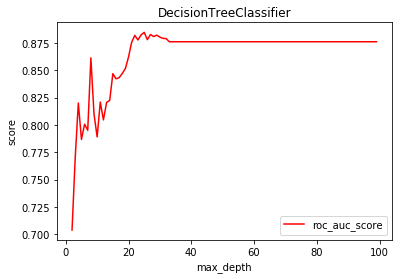

In [15]:
#model = KNeighborsClassifier(n_neighbors=19)
#model = LogisticRegression()

max_c = 0;
max_j = 0;
y_fsc = []
y_rauc = []
y_acc = []
y_ll = []
for j in range(2, 100):
    x_vals = np.arange(2, 100)
    model = DecisionTreeClassifier(max_depth = j, random_state=0)
    model.fit(X, Y)
    y_pred = model.predict(X_test)
    f_sc = f1_score(y_pred, Y_test)
    y_fsc.append(f_sc)
    r_auc = roc_auc_score(y_pred, Y_test)
    y_rauc.append(r_auc)
    acc = accuracy_score(y_pred, Y_test)
    y_acc.append(acc)
    if f_sc > max_c:
        max_c = f_sc
        max_j = j
print "Max f1_score on max_depth  ",  max_j, " is ", max_c
plt.figure()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.title('DecisionTreeClassifier')
#plt.plot(x_vals, y_fsc, color = "green", label = "f1_score")
plt.plot(x_vals, y_rauc, color = "red", label = "roc_auc_score")
#plt.plot(x_vals, y_acc, color = "black", label = "accuracy_score")
plt.legend()

In [16]:
model = DecisionTreeClassifier(max_depth = 29, random_state=0)
model.fit(train5[cols], train5['CSI'])
#y_pred = model.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=29,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [17]:
test5 = test5 [~test5 ['COM_CAT#34'].isnull()]
test5  = test5 [~test5 ['COM_CAT#8'].isnull()]
test5  = test5 [~test5 ['INTERNET_TYPE_ID'].isnull()]
test5  = test5 [~test5 ['DEVICE_TYPE_ID'].isnull()]
test5  = test5 [~test5 ['ARPU_GROUP'].isnull()]

In [18]:
y_pred = model.predict(test5[cols])

In [19]:
np.array(test5['SK_ID'])

array([1066, 2863,  866, ..., 3174, 4523, 3386])

In [36]:
dic = {}
for i in range(len(test5['SK_ID'])):
    dic[np.array(test5['SK_ID'])[i]] = y_pred[i]

In [21]:
test4_big = pandas.read_csv('./test/subs_csi_test.csv', sep = ';')

In [34]:
res_mas = []
for i in range(len(test4['SK_ID'])):
    if np.array(test4['SK_ID'])[i] not in dic:
        res_mas.append(0)
    else:
        res_mas.append(dic[np.array(test4['SK_ID'])[i]])

In [35]:
f = open('RESULT_NEW_2','w')
for i in res_mas:
    f.write(str(i))
    f.write(str('\n'))